In [1]:
def bispecplot(btype,bn=20,s=1e10,n=2,c=['b','g','m'],fsize=12,simn=108,yfsize=14):

    fig = subplots(figsize=[10,7])
    ax0 = subplot2grid((5,1),(0,0),rowspan=2)
    ax1 = subplot2grid((5,1),(2,0))
    ax2 = subplot2grid((5,1),(3,0))
    ax1.axhline(0.,ls='--',color='k',lw=0.5)
    ax2.axhline(0.,ls='--',color='k',lw=0.5)

    if btype == 'equi': 
        m0 = 1
        ax0.set_ylabel(r'$10^{10} \ell^2b_{\ell\ell\ell}$ (equilateral)',fontsize=yfsize)
        ax0.set_ylim(.0,.5)
        ax1.set_ylim(-.29,.29)

    if btype == 'fold': 
        m0 = 2
        ax0.set_ylabel(r'$10^{10} \ell^2b_{\ell,\ell/2,\ell/2}$ (folded)',fontsize=yfsize)
        ax0.set_ylim(0.,2.)
        ax1.set_ylim(-.3,.3)

    if btype == 'sque': 
        m0 = 3
        ax0.set_ylabel(r'$10^{10} \ell^2b_{\ell_0,\ell,\ell}$ (squeezed)',fontsize=yfsize)
        ax0.set_ylim(0,6.)
        ax1.set_ylim(-.3,.2)

    if btype == 'angl': 
        m0 = 4
        n = 1
        s = 1e14
        ax0.set_ylabel(r'$10^{14} \ell^2b_{\ell,\ell_h,\ell_h}$ (isosceles)',fontsize=yfsize)
        ax0.set_ylim(-.1,5.)
        ax1.set_ylim(-.3,.3)

    ax1.set_ylabel(r'$\Delta b/b$',fontsize=yfsize)
    ax2.set_ylabel(r'$\Delta b/\sigma_{\rm obs}$',fontsize=yfsize)

    Dir = '/global/homes/t/toshiyan/Work/Ongoing/bisp/data/modelw/bl/'

    ax2.set_xlabel(r'multipole $\ell$',fontsize=fsize)
    ax0.set_xlim(1,2048)
    ax0.set_xticklabels([])
    ax1.set_xlim(1,2048)
    ax1.set_xticklabels([])
    ax1.set_yticks([-.1,0.,.1])
    ax1.set_yticklabels(['-10\%','0\%','10\%'])
    ax2.set_xlim(1,2048)
    ax2.set_ylim(-5,5)

    # binned spectrum
    b, Bb0, pb0 = np.loadtxt(Dir+'bl_SC_b'+str(bn)+'_zs1.dat',unpack=True,usecols=(0,m0,m0+4))
    b, Bb1, pb1 = np.loadtxt(Dir+'bl_GM_b'+str(bn)+'_zs1.dat',unpack=True,usecols=(0,m0,m0+4))
    b, Bb2, pb2 = np.loadtxt(Dir+'bl_RT_b'+str(bn)+'_zs1.dat',unpack=True,usecols=(0,m0,m0+4))
    ax0.plot(b,b**n*s*Bb0,c[0]+'-',label=r'Scoccimaro \& Couchman (2001)')
    ax0.plot(b,b**n*s*Bb1,c[1]+'-',label=r'Gil-Marin et al. (2012)')
    ax0.plot(b,b**n*s*Bb2,c[2]+'-',label=r'Takahashi et al. (2020)')
    ax0.plot(b,b**n*s*(Bb0+pb0),c[0],ls='--')
    ax0.plot(b,b**n*s*(Bb1+pb1),c[1],ls='--')
    ax0.plot(b,b**n*s*(Bb2+pb2),c[2],ls='--')

    # full sim
    b, sbl, vbl = np.loadtxt(Dir+'../../sim/sim_bispec_nres13_zs16.dat',unpack=True,usecols=(0,m0,m0+4))
    #vbl = vbl/simn**0.5
    ax0.errorbar(b,b**n*s*sbl,yerr=b**n*s*vbl,fmt='o',color='k')

    # ratio
    ax1.errorbar(b,(sbl-Bb0)/Bb0,yerr=vbl/Bb0,fmt='o',color=c[0])
    ax1.errorbar(b,(sbl-Bb1)/Bb1,yerr=vbl/Bb1,fmt='o',color=c[1])
    ax1.errorbar(b,(sbl-Bb2)/Bb2,yerr=vbl/Bb2,fmt='o',color=c[2])
    ax1.fill_between(np.arange(1,2048),-0.1,.1,color='k',alpha=0.3)

    # diff
    ax2.errorbar(b,(sbl-Bb0)/vbl,yerr=vbl/vbl,fmt='o',color=c[0])
    ax2.errorbar(b,(sbl-Bb1)/vbl,yerr=vbl/vbl,fmt='o',color=c[1])
    ax2.errorbar(b,(sbl-Bb2)/vbl,yerr=vbl/vbl,fmt='o',color=c[2])
    ax2.fill_between(np.arange(1,2048),-1,1,color='k',alpha=0.3)

    ax0.legend(loc=0,frameon=False)
    subplots_adjust(bottom=0.1,right=0.75,top=0.9,wspace=0,hspace=0)
    savefig('fig_bl_'+btype+'_b'+str(bn)+'.png',bbox_inches='tight')
    show()
    clf()

In [2]:
import numpy as np, matplotlib as mpl
from matplotlib.pyplot import *
mpl.rc('text',usetex=True)
mpl.rcParams.update({'font.size': 16,'legend.fontsize':12,'font.family':'sans','font.style':'normal'})

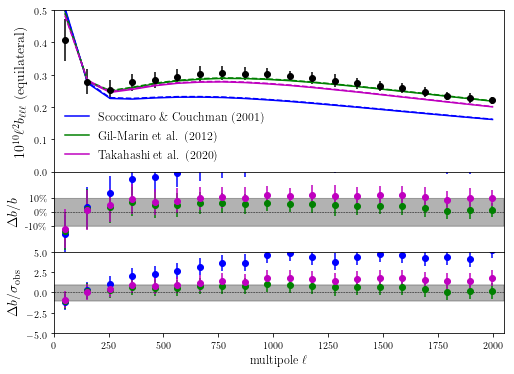

<Figure size 432x288 with 0 Axes>

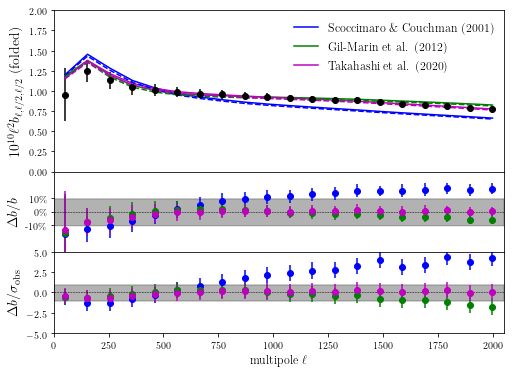

<Figure size 432x288 with 0 Axes>

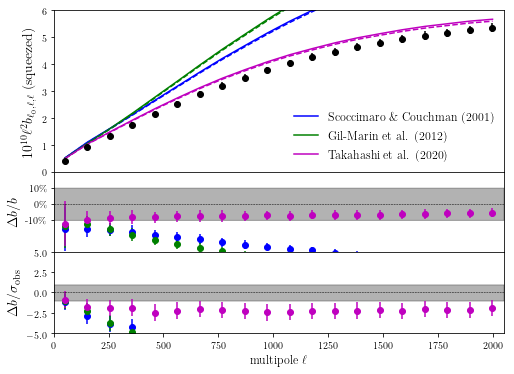

<Figure size 432x288 with 0 Axes>

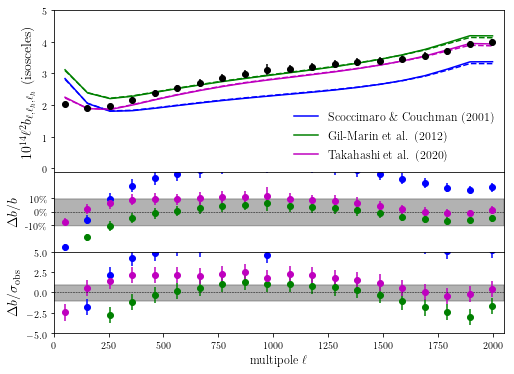

<Figure size 432x288 with 0 Axes>

In [3]:
bn = 20
for btype in ['equi','fold','sque','angl']: 
    bispecplot(btype,bn,simn=10)